In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,model_selection

In [87]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [88]:
df = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [129]:
df.isnull().sum()

Maxi Prin Strs    0
Mini Prin Strs    0
Sa                0
Sm                0
Sn'               0
Sn                0
b                 0
b'                0
N'                0
N                 0
Cycles            0
dtype: int64

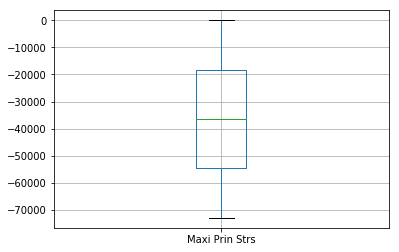

In [137]:
df.boxplot('Maxi Prin Strs')

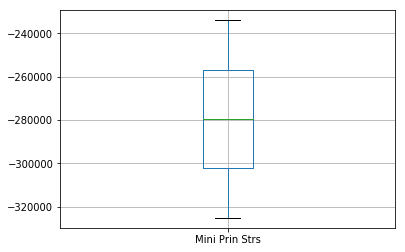

In [138]:
df.boxplot('Mini Prin Strs')

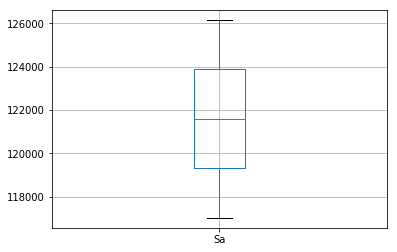

In [139]:
df.boxplot('Sa')

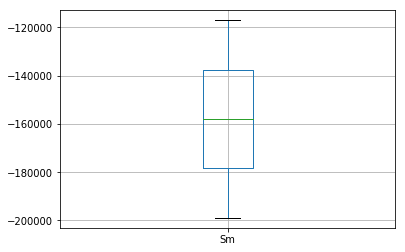

In [140]:
df.boxplot('Sm')

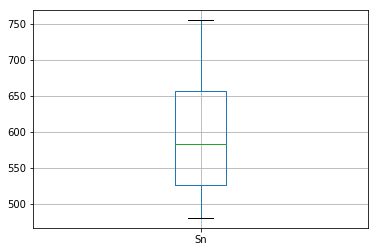

In [141]:
df.boxplot('Sn')

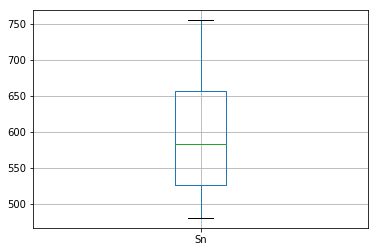

In [142]:
df.boxplot('Sn')

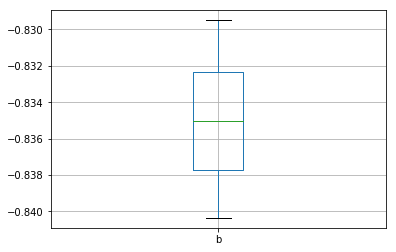

In [143]:
df.boxplot('b')

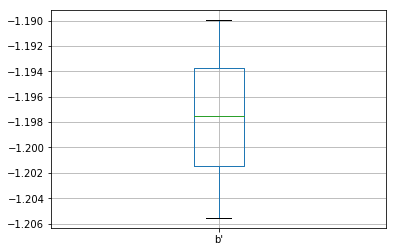

In [144]:
df.boxplot("b'")

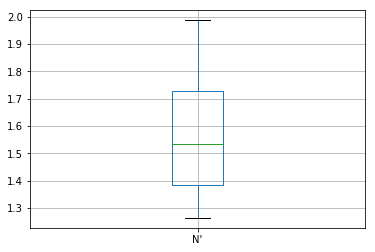

In [145]:
df.boxplot("N'")

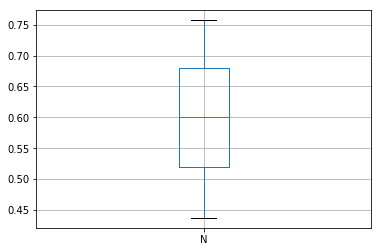

In [146]:
df.boxplot('N')

In [128]:
df.head()

,Maxi Prin Strs,Mini Prin Strs,Sa,Sm,Sn',Sn,b,b',N',N,Cycles
0,-72920.0,-325100.0,126144.25,-198955.75,262.783882,480.030393,-0.840361,-1.189964,1.263238,0.757245,757244.799169
1,-72811.5,-324964.5,126130.75,-198833.75,262.623355,480.272403,-0.840346,-1.189986,1.263875,0.756787,756786.869579
2,-72703.0,-324829.0,126117.25,-198711.75,262.462829,480.514709,-0.840330,-1.190008,1.264512,0.756329,756328.873667
3,-72594.5,-324693.5,126103.75,-198589.75,262.302303,480.757312,-0.840315,-1.190030,1.265151,0.755871,755870.811459
4,-72486.0,-324558.0,126090.25,-198467.75,262.141776,481.000212,-0.840299,-1.190052,1.265790,0.755413,755412.682979


In [91]:
test.head()

,Maxi Prin Strs,Mini Prin Strs,Sa,Sm,Sn',Sn,b,b',N',N
0,-72920.0,-325100.0,126144.25,-198955.75,262.783882,480.030393,-0.840361,-1.189964,1.263238,0.757245
1,-72811.5,-324964.5,126130.75,-198833.75,262.623355,480.272403,-0.840346,-1.189986,1.263875,0.756787
2,-72703.0,-324829.0,126117.25,-198711.75,262.462829,480.514709,-0.840330,-1.190008,1.264512,0.756329
3,-72594.5,-324693.5,126103.75,-198589.75,262.302303,480.757312,-0.840315,-1.190030,1.265151,0.755871
4,-72486.0,-324558.0,126090.25,-198467.75,262.141776,481.000212,-0.840299,-1.190052,1.265790,0.755413


In [90]:
corr = df.corr()

In [92]:
corr

,Maxi Prin Strs,Mini Prin Strs,Sa,Sm,Sn',Sn,b,b',N',N,Cycles
Maxi Prin Strs,1.000000,1.000000,-1.000000,1.000000,-1.000000,0.990727,0.999953,-0.999914,0.990727,-0.999955,-0.999955
Mini Prin Strs,1.000000,1.000000,-1.000000,1.000000,-1.000000,0.990727,0.999953,-0.999914,0.990727,-0.999955,-0.999955
Sa,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-0.990737,-0.999953,0.999916,-0.990737,0.999955,0.999955
Sm,1.000000,1.000000,-1.000000,1.000000,-1.000000,0.990726,0.999952,-0.999914,0.990726,-0.999955,-0.999955
Sn',-1.000000,-1.000000,1.000000,-1.000000,1.000000,-0.990726,-0.999952,0.999914,-0.990726,0.999955,0.999955
Sn,0.990727,0.990727,-0.990737,0.990726,-0.990726,1.000000,0.991991,-0.992406,1.000000,-0.991946,-0.991946
b,0.999953,0.999953,-0.999953,0.999952,-0.999952,0.991991,1.000000,-0.999994,0.991991,-0.999999,-0.999999
b',-0.999914,-0.999914,0.999916,-0.999914,0.999914,-0.992406,-0.999994,1.000000,-0.992406,0.999993,0.999993
N',0.990727,0.990727,-0.990737,0.990726,-0.990726,1.000000,0.991991,-0.992406,1.000000,-0.991946,-0.991946
N,-0.999955,-0.999955,0.999955,-0.999955,0.999955,-0.991946,-0.999999,0.999993,-0.991946,1.000000,1.000000


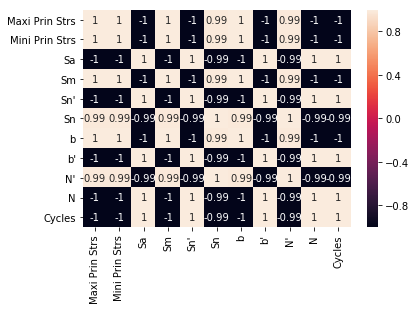

In [93]:
sns.heatmap(corr,annot = True)

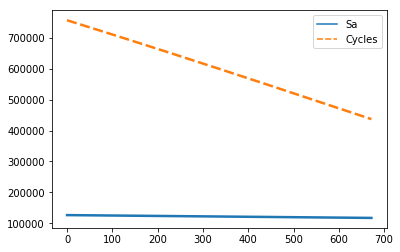

In [151]:
facet = df[['Sa','Cycles']]
sns.lineplot(data=facet, palette="tab10", linewidth=2.5)

c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


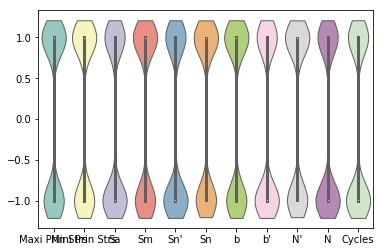

In [152]:
sns.violinplot(data=corr, palette="Set3", bw=.2, cut=1, linewidth=1)

In [94]:
df.dtypes

Maxi Prin Strs    float64
Mini Prin Strs    float64
Sa                float64
Sm                float64
Sn'               float64
Sn                float64
b                 float64
b'                float64
N'                float64
N                 float64
Cycles            float64
dtype: object

In [98]:
df.columns

Index(['Maxi Prin Strs', 'Mini Prin Strs', 'Sa', 'Sm', 'Sn'', 'Sn', 'b', 'b'',
       'N'', 'N', 'Cycles'],
      dtype='object')

In [147]:
df.describe()

,Maxi Prin Strs,Mini Prin Strs,Sa,Sm,Sn',Sn,b,b',N',N,Cycles
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,-36464.000000,-279572.000000,121608.175334,-157963.824666,208.847138,593.860216,-0.835026,-1.197584,1.562790,0.598855,598854.517600
std,21094.857479,26344.269017,2624.835710,23719.434098,31.209782,78.311861,0.003126,0.004483,0.206084,0.092865,92864.780708
min,-72920.000000,-325100.000000,117022.000000,-198955.750000,154.976316,480.030393,-0.840361,-1.205553,1.263238,0.437000,437000.162094
25%,-54692.000000,-302336.000000,119340.250000,-178459.750000,181.878618,525.310129,-0.837735,-1.201440,1.382395,0.518791,518790.879213
50%,-36464.000000,-279572.000000,121608.250000,-157963.750000,208.847039,582.283811,-0.835060,-1.197519,1.532326,0.599844,599844.266332
75%,-18236.000000,-256808.000000,123876.250000,-137467.750000,235.815461,656.153269,-0.832334,-1.193695,1.726719,0.679404,679403.920936
max,-8.000000,-234044.000000,126144.250000,-117022.000000,262.783882,755.096025,-0.829495,-1.189964,1.987095,0.757245,757244.799169


c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


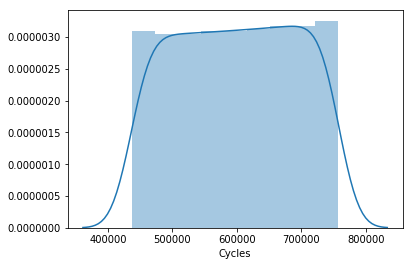

In [107]:
sns.distplot(df.Cycles)

In [99]:
df.columns

Index(['Maxi Prin Strs', 'Mini Prin Strs', 'Sa', 'Sm', 'Sn'', 'Sn', 'b', 'b'',
       'N'', 'N', 'Cycles'],
      dtype='object')

In [97]:
X = np.array(df.drop(['Cycles',"Maxi Prin Strs","Mini Prin Strs","Sm","Sn","b","N'"], 1))
X = preprocessing.scale(X)

In [96]:
a=df.drop(['Cycles',"Maxi Prin Strs","Mini Prin Strs","Sm","Sn","b","N'"], 1)
a.head()

,Sa,Sn',b',N
0,126144.25,262.783882,-1.189964,0.757245
1,126130.75,262.623355,-1.189986,0.756787
2,126117.25,262.462829,-1.190008,0.756329
3,126103.75,262.302303,-1.190030,0.755871
4,126090.25,262.141776,-1.190052,0.755413


In [102]:
y = np.array((df['Cycles']))
y = np.array(df['Cycles'])

In [101]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [ ]:
clf = XGBRegressor()

In [154]:
clf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [105]:
y_pred = clf.predict(test)
#predictions = [value for value in y_pred]

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3'] ['Maxi Prin Strs', 'Mini Prin Strs', 'Sa', 'Sm', "Sn'", 'Sn', 'b', "b'", "N'", 'N']
expected f3, f1, f0, f2 in input data
training data did not have the following fields: Maxi Prin Strs, b, Sm, b', Sa, Sn', Sn, Mini Prin Strs, N', N

In [109]:
predictions

[587474.44,
 503434.2,
 612159.06,
 743539.9,
 498759.78,
 510107.66,
 476206.16,
 639305.6,
 732396.56,
 451927.97,
 454624.16,
 682577.6,
 565264.56,
 682238.9,
 680209.9,
 546505.06,
 514337.4,
 533487.4,
 488533.53,
 639305.6,
 494176.53,
 612159.06,
 570472.44,
 735328.8,
 638712.94,
 459961.38,
 513864.53,
 744817.94,
 698777.25,
 608438.7,
 464550.94,
 589521.0,
 698628.9,
 611734.56,
 741814.6,
 638712.94,
 542823.25,
 542794.8,
 521417.03,
 645383.44,
 710040.06,
 533487.4,
 608614.2,
 702460.75,
 576169.7,
 549848.3,
 597495.4,
 589907.7,
 549848.3,
 723057.0,
 665237.0,
 672332.8,
 632225.75,
 728226.56,
 473872.44,
 473872.44,
 481859.84,
 585598.2,
 605936.4,
 597495.4,
 740568.75,
 501465.25,
 738736.8,
 570472.44,
 682577.6,
 589907.7,
 483456.16,
 632225.75,
 679812.3,
 723057.0,
 605520.2,
 648318.56,
 448044.53,
 455958.06,
 639305.6,
 607061.7,
 486062.03,
 605936.4,
 750694.44,
 682577.6,
 463601.0,
 449844.9,
 620727.06,
 503434.2,
 662456.75,
 679812.3,
 682577.6,

In [111]:
len(test)

673

# Accuracy measure using test split

In [103]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9998137021346483

# Cross validation

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
data_dmatrix

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=3000,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
type(cv_results)

In [ ]:
cv_results.tail()

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

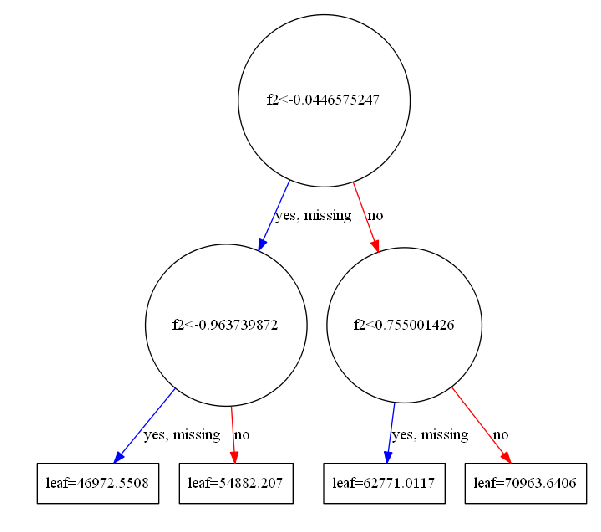

In [169]:
import matplotlib.pyplot as plt

ax=xgb.plot_tree(xg_reg,num_trees=0,to_file='xgb.png')
fig=ax.figure
fig.set_size_inches(10, 15)


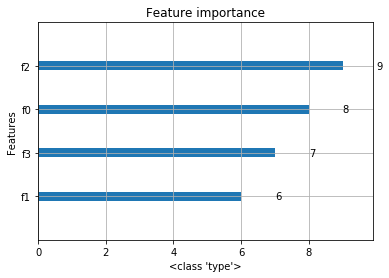

In [112]:
xgb.plot_importance(xg_reg, xlabel=type, importance_type='weight')

In [114]:
final = pd.read_excel('final.xlsx')

In [157]:
final.columns

Index(['Maxi Prin Strs', 'Mini Prin Strs', 'Sa', 'Sm', 'Sn'', 'Sn', 'b', 'b'',
       'N'', 'N', 'Cycles', 'XGBOOST', 'ANN'],
      dtype='object')

In [160]:
final.drop(['ANN'],1).head()

,Maxi Prin Strs,Mini Prin Strs,Sa,Sm,Sn',Sn,b,b',N',N,Cycles,XGBOOST
0,-72920.0,-325100.0,126144.25,-198955.75,262.783882,480.030393,-0.840361,-1.189964,1.263238,0.757245,757244.799169,756374.5
1,-72811.5,-324964.5,126130.75,-198833.75,262.623355,480.272403,-0.840346,-1.189986,1.263875,0.756787,756786.869579,756374.5
2,-72703.0,-324829.0,126117.25,-198711.75,262.462829,480.514709,-0.840330,-1.190008,1.264512,0.756329,756328.873667,756374.5
3,-72594.5,-324693.5,126103.75,-198589.75,262.302303,480.757312,-0.840315,-1.190030,1.265151,0.755871,755870.811459,756374.5
4,-72486.0,-324558.0,126090.25,-198467.75,262.141776,481.000212,-0.840299,-1.190052,1.265790,0.755413,755412.682979,756374.5


In [156]:
final.drop(['ANN']).head()

KeyError: "['ANN'] not found in axis"